In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import fft
import wave
import sys
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import callbacks
from scipy.io.wavfile import write
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile
import scipy.signal as signal

In [2]:
path = 'C:/Users/User/Desktop/AppStat/MachineLearning/AppliedML2024/final_project/data/nsynth-test/audio/'

In [55]:
def read_wav_file(filename):
    with wave.open(filename, 'rb') as wf:
        params = wf.getparams()
        num_channels, sampwidth, framerate, num_frames = params[:4]
        frames = wf.readframes(num_frames)
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, params

def read_wav_file_scipy(filename):
    framerate, waveform = wavfile.read(filename)
    return waveform, framerate

def plot_waveform(waveform, framerate):
    # Create a time array in seconds
    time_array = np.arange(0, len(waveform)) / framerate
    plt.figure(figsize=(15, 5))
    plt.plot(time_array, waveform, label="Waveform")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.legend()
    plt.show()

def read_files_in_dir(directory):
    filenames = os.listdir(directory)
    return filenames


def pick_5_samples(arrays):
    instruments = []
    for array in arrays:
        pick = np.random.choice(array, 1)
        instruments.append(pick)
    return instruments

def pick_samples_and_classify(arrays):
    #Picks a random number of samples, and returns their filepath and label
    instruments = []
    #pick at minimum two instruments
    number_of_instruments = np.random.randint(2, len(arrays) + 1)
    labels = np.zeros(len(arrays))
    already_picked = []

    while len(instruments) < number_of_instruments:
        random_pick = np.random.randint(0, len(arrays))
        if random_pick in already_picked:
            break
        else:
            already_picked.append(random_pick)
            pick = np.random.choice(arrays[random_pick], 1)
            instruments.append(pick)
            labels[random_pick] = 1

    return instruments, labels
#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file_scipy(path + filename[0])
        waveforms.append(waveform)
    return waveforms
        
#Fast fourier transform
def fft_h(data, sample_rate):
    n = len(data)
    fft_data = np.fft.fft(data)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    return freq[:n//2], np.abs(fft_data[:n//2])

def normalize_waveform(waveform):
    return waveform

def combine_waveforms(waveforms):

    normalization =  1 / len(waveforms)
    out = np.zeros_like(waveforms[0], dtype=np.float32)
    for w in waveforms:
        out += w.astype(np.float32) * normalization
    return out # note, this retuns a float32 array - it is needed to convert this to int16 before saving it to a wav file
def waveform_to_wavfile(waveform, name_string, sample_rate = 16000):
    write(name_string, sample_rate, waveform.astype(np.int16))

def gen_combo_waveform():
    paths, label = pick_samples_and_classify([bass, guitar, flutes, keyboards])
    waveforms = add_waveform_to_list(paths)
    return combine_waveforms(waveforms), label

def gen_data_set(N):
    data = []
    labels = []
    for i in range(N):
        waveform, label = gen_combo_waveform()
        f,t,zxx = signal.spectrogram(waveform)
        data.append(zxx)
        labels.append(label)
        #f,t,zxx = signal.stft(waveform, fs=16000, nperseg=256)
    return data, labels
#Sorting the files in directory

filenames = read_files_in_dir(path)
#pianos = [filename for filename in filenames if "piano" in filename] #empty
bass = [filename for filename in filenames if "bass" in filename]
guitar = [filename for filename in filenames if "guitar" in filename]
#drum = [filename for filename in filenames if "drum" in filename] #empty
flutes = [filename for filename in filenames if "flute" in filename]
keyboards = [filename for filename in filenames if "keyboard" in filename] 



In [115]:
#Pick a random sample from each instrument list
waveforms = add_waveform_to_list(pick_5_samples([bass, guitar, flutes, keyboards]))




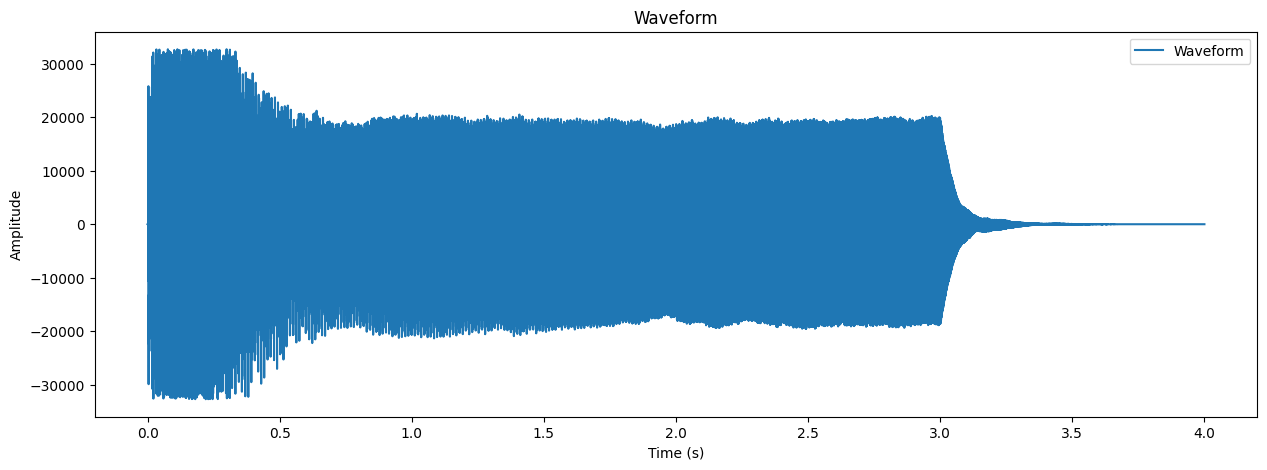

In [116]:
#Combine in a single list
combo = normalize_waveform(waveforms[0]) + normalize_waveform(waveforms[1]) +normalize_waveform(waveforms[2]) + normalize_waveform(waveforms[3])

sam_rate = 16000

plot_waveform(combo, sam_rate)


In [117]:
#Write to new file
from scipy.io.wavfile import write

combo = waveforms[0] + waveforms[1] + waveforms[2] + waveforms[3]

sam_rate = 16000

write("combo.wav", sam_rate, combo)

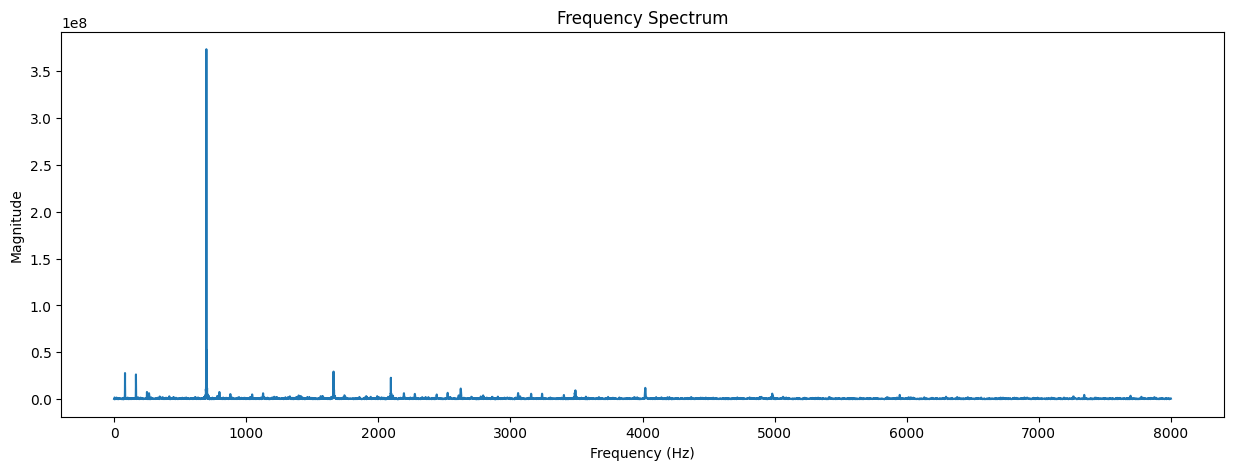

In [118]:
# Fast Fourier Transform (FFT) to convert the waveform to the frequency domain
def plot_fft(waveform, framerate):
    # Perform the FFT
    spectrum = fft.fft(waveform)
    freqs = fft.fftfreq(len(spectrum), 1 / framerate)
    # Plot the magnitude of the spectrum
    plt.figure(figsize=(15, 5))
    plt.plot(freqs[:len(freqs) // 2], np.abs(spectrum)[:len(freqs) // 2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum')
    plt.show()

plot_fft(combo, sam_rate)


In [119]:
keybords_mask  = [filename for filename in filenames if "keyboard" in filename]
bass_mask = [filename for filename in filenames if "bass" in filename]
guitar_mask = [filename for filename in filenames if "guitar" in filename]



In [120]:

# combine the two masks
mask = keybords_mask + bass_mask + guitar_mask
mask

['keyboard_acoustic_004-022-050.wav',
 'keyboard_acoustic_004-025-100.wav',
 'keyboard_acoustic_004-026-050.wav',
 'keyboard_acoustic_004-026-100.wav',
 'keyboard_acoustic_004-027-050.wav',
 'keyboard_acoustic_004-028-050.wav',
 'keyboard_acoustic_004-028-075.wav',
 'keyboard_acoustic_004-028-100.wav',
 'keyboard_acoustic_004-029-025.wav',
 'keyboard_acoustic_004-029-050.wav',
 'keyboard_acoustic_004-029-100.wav',
 'keyboard_acoustic_004-029-127.wav',
 'keyboard_acoustic_004-031-025.wav',
 'keyboard_acoustic_004-031-050.wav',
 'keyboard_acoustic_004-031-127.wav',
 'keyboard_acoustic_004-033-025.wav',
 'keyboard_acoustic_004-033-075.wav',
 'keyboard_acoustic_004-033-127.wav',
 'keyboard_acoustic_004-034-075.wav',
 'keyboard_acoustic_004-035-050.wav',
 'keyboard_acoustic_004-035-075.wav',
 'keyboard_acoustic_004-036-100.wav',
 'keyboard_acoustic_004-037-025.wav',
 'keyboard_acoustic_004-037-075.wav',
 'keyboard_acoustic_004-038-025.wav',
 'keyboard_acoustic_004-039-075.wav',
 'keyboard_a

In [121]:
# generate a datafile with the mask filenames and their labels, as an example 'keyboard_acoustic_004-034-075.wav', 'keyboard'
data = []
for filename in mask:
    label = filename.split('_')[0]
    data.append([filename, label])
df = pd.DataFrame(data, columns=['filename', 'label'])
df.to_csv('mask.csv', index=False)


In [122]:
# Convert the mask to frequency domain using FFT
import scipy.signal as signal
# using ShortTimeFFT to convert the waveform to the frequency domain


def read_wav_files(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file(data + filename)
        waveforms.append(waveform)
    return waveforms

def normalize_waveforms(waveforms):
    return [waveform / np.max(np.abs(waveform)) for waveform in waveforms]

def stft(waveform, framerate):
    f, t, Zxx = signal.stft(waveform, framerate, nperseg=1024)
    return f, t, Zxx

def plot_spectrogram(f, t, Zxx):
    plt.figure(figsize=(15, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

waveforms = read_wav_files(mask)
waveforms = normalize_waveforms(waveforms)
f, t, Zxx = stft(waveforms[0], sam_rate)
plot_spectrogram(f, t, Zxx)


TypeError: can only concatenate list (not "str") to list

In [ ]:
# Train a simple neural network to classify the mask catagories using the STFT data as input
# Load the data
df = pd.read_csv('mask.csv')
filenames = df['filename']
labels = df['label']
waveforms = read_wav_files(filenames)

# Normalize the waveforms
waveforms = normalize_waveforms(waveforms)

# Convert the waveforms to the frequency domain
X = []
for waveform in waveforms:
    f, t, Zxx = stft(waveform, sam_rate)
    X.append(np.abs(Zxx))
X = np.array(X)

# Convert the labels to one-hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = models.Sequential()
model.add(layers.Input(shape=(X.shape[1], X.shape[2])))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model implement early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])




Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5414 - loss: 0.9981 - val_accuracy: 0.6934 - val_loss: 0.6974
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7349 - loss: 0.6557 - val_accuracy: 0.7624 - val_loss: 0.5887
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8444 - loss: 0.4319 - val_accuracy: 0.7956 - val_loss: 0.4805
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8973 - loss: 0.3009 - val_accuracy: 0.8453 - val_loss: 0.3883
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9480 - loss: 0.1776 - val_accuracy: 0.8453 - val_loss: 0.3952
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9540 - loss: 0.1544 - val_accuracy: 0.8923 - val_loss: 0.3266
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9883 - loss: 0.0767 - val_accuracy: 0.8840 - val_loss: 0.3285
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9868 - loss: 0.0540 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9166 - loss: 0.5624
Loss: 0.5449233651161194, Accuracy: 0.9227373003959656


In [128]:


guitar = read_wav_file(path + 'guitar_acoustic_015-075-127.wav')[0]
keyboard = read_wav_file(path + 'keyboard_acoustic_004-045-025.wav')[0]
bass = read_wav_file(path + 'bass_electronic_018-029-075.wav')[0]
combo= combine_waveforms([keyboard, guitar, bass])
waveform_to_wavfile(combo,"combo.wav")


keyboard_acoustic_004-022-050.wav


In [ ]:
# Using the trained model to predict the mask of the mixed audio file
waveform, params = read_wav_file('combo.wav')
waveform = normalize_waveform(waveform)
f, t, Zxx = stft(waveform, sam_rate)
X = np.array([np.abs(Zxx)])
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
label = label_encoder.inverse_transform(y_pred)
print(f'The predicted label is: {label[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted label is: keyboard


In [56]:
#Using gen_data_set to generate a dataset of 1000 samples
data, labels = gen_data_set(1000)
data = np.array(data)
labels = np.array(labels)
data[9].shape




(129, 285)

In [54]:
# Find the shape of 1 element in the data
data.shape


(1000, 129, 501)

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from scipy.signal import stft
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K

#Using gen_data_set to generate a dataset of 1000 samples
# normalize the data with standard scaler
data, labels = gen_data_set(1000)
data = np.array(data)
labels = np.array(labels)
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, data.shape[-1])).reshape(data.shape)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# use 2d convolutional layers to classify the audio samples in data into the labels in labels
model = models.Sequential()
model.add(layers.Input(shape=(129,285, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 127, 283, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 141, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 61, 139, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 67, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 33, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 59136)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │     7,569,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,672,676 (29.27 MB)

 Trainable params: 7,672,676 (29.27 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Train the model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - accuracy: 0.5269 - loss: 0.1569 - val_accuracy: 0.4437 - val_loss: 0.8963
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 514ms/step - accuracy: 0.4909 - loss: 0.1853 - val_accuracy: 0.4313 - val_loss: 0.8826
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.4686 - loss: 0.1627 - val_accuracy: 0.4500 - val_loss: 0.9355
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 499ms/step - accuracy: 0.5314 - loss: 0.1401 - val_accuracy: 0.4375 - val_loss: 0.9983
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.5143 - loss: 0.1022 - val_accuracy: 0.4313 - val_loss: 1.1366
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 510ms/step - accuracy: 0.4705 - loss: 0.1112 - val_accuracy: 0.4125 - val_loss: 1.0871
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.5338 - loss: 0.0925 - val_accuracy: 0.4500 - val_loss: 1.1504
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.5667 - loss: 0.0657 - 

In [82]:
# predict the labels of the test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# add a dimension to the data
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

y_pred = model.predict(X_test)
print(np.round(y_pred[:10]))
print(y_test[:10])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]


In [144]:
# New approach using multi-label classification

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from scipy.signal import stft
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K
# Function to read wav files
def read_wav_files(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file(path + filename)
        waveforms.append(waveform)
    return waveforms


def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is float32 for TensorFlow compatibility
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is float32 for TensorFlow compatibility
    
    # Compute the confusion matrix
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    
    # Compute precision and recall
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (actual_positives + K.epsilon())
    
    # Compute F1-score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    
    # Average F1-score across all classes
    f1_macro = K.mean(f1)
    
    return f1_macro


# Load the data
df = pd.read_csv('mask.csv')
filenames = df['filename']
labels = df['label'].apply(lambda x: [x]).tolist()  # Assuming labels are stored as lists of labels in string format

waveforms = read_wav_files(filenames)

# Normalize the waveforms using sklearn's StandardScaler
scaler = StandardScaler()
waveforms = [scaler.fit_transform(waveform.reshape(-1, 1)).reshape(-1) for waveform in waveforms]



# Convert the waveforms to the frequency domain
X = []
for waveform in waveforms:
    f, t, Zxx = stft(waveform, nperseg=1024)  # Adjust nperseg as necessary
    X.append(np.abs(Zxx))
X = np.array(X)

# Convert the labels to multi-label binary format (multi-hot encoding)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, , test_size=0.2, random_state=42)

# Build the neural network
model = models.Sequential()
model.add(layers.Input(shape=(X.shape[1], X.shape[2])))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(mlb.classes_), activation='sigmoid'))  # Use sigmoid for multi-label classification

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])



ValueError: Found input variables with inconsistent numbers of samples: [1000, 2261]

In [129]:
def predict_instruments(wav_file, model, mlb):
    waveform, _ = read_wav_file(wav_file)
    #waveform = normalize_waveform(waveform)
    f, t, Zxx = stft(waveform, nperseg=1024)  # Adjust nperseg as necessary
    X = np.array([np.abs(Zxx)])
    y_pred = model.predict(X)[0]  # Get predictions for the first (and only) sample
    print("Predicted probabilities:", y_pred)
    threshold = 0.5  # Adjust as needed
    predicted_labels = mlb.classes_[y_pred > threshold]  # Select labels above the threshold
    return predicted_labels.tolist()  # Convert to list for consistent output format

# Predict the instruments in the mixed audio file
predicted_labels = predict_instruments('combo.wav', model, mlb)
print(f'The predicted labels are: {predicted_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted probabilities: [0. 0. 1.]
The predicted labels are: ['keyboard']


In [ ]:
# Predict the instruments in the mixed audio file
predicted_labels = predict_instruments('combo.wav', model, mlb)
print(f'The predicted labels are: {predicted_labels}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted labels are: [('keyboard',)]


In [ ]:
X

array([[[6.30624009e-03, 1.08461983e-02, 3.61602303e-03, ...,
         3.06023643e-05, 1.51703939e-05, 1.43225590e-05],
        [7.00792276e-03, 9.02368334e-03, 5.83829887e-03, ...,
         3.51341280e-05, 1.90630794e-05, 1.57957980e-05],
        [8.17586861e-03, 6.38344068e-03, 6.22052271e-03, ...,
         4.13896046e-05, 3.19519309e-05, 1.26673499e-05],
        ...,
        [3.74160960e-07, 2.55149166e-07, 1.37447179e-06, ...,
         9.69674518e-07, 1.42372431e-07, 7.98983651e-07],
        [4.63818003e-07, 8.38952714e-08, 2.57509344e-06, ...,
         1.03138124e-06, 1.03010713e-06, 6.31439750e-07],
        [5.15024489e-07, 1.72109983e-07, 2.93026080e-06, ...,
         9.02917329e-07, 1.55379657e-06, 5.48942739e-07]],

       [[9.33098913e-04, 1.43686039e-03, 5.10595346e-05, ...,
         1.02648743e-05, 3.96523085e-06, 2.20371858e-06],
        [1.68953022e-03, 5.51289588e-03, 7.20582071e-04, ...,
         5.73808525e-05, 1.69262904e-05, 3.93516496e-06],
        [2.45479860e-03, 